<a href="https://colab.research.google.com/github/Roya62/sentiment-analysis/blob/main/Exploration_second_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [3]:
import pandas as pd

data = pd.read_csv('/content/Bigtech - 20-09-2020 till 13-10-2020 2.csv')[['text','polarity']]
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)
data.columns = ['text','sentiment']

In [4]:
data.head()

,text,sentiment
0,#NVIDIA #GauGAN is actually a good tool to pra...,0.4404
1,"#BullSequana X2415, the first #supercomputer b...",0.0000
2,I'm going to attend GTC 2020 tonight! Excited....,0.4003
3,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0000
4,"#BullSequana X2415, the first #supercomputer b...",0.0000


In [5]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [6]:
data['sentiment'] = data['sentiment'].apply(lambda a:1 if a>0.8 else -1 if a<-0.8 else a)

data = data[(data.sentiment==0) | (data.sentiment==1) | (data.sentiment==-1)]
data = data.reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    98225
 1.0    17646
-1.0     2692
Name: sentiment, dtype: int64

In [7]:
for i in range(len(data.sentiment)):
    if data.sentiment[i] == -1:
        data["sentiment"][i] = "negative"
    elif data.sentiment[i] == 0:
        data["sentiment"][i] = "neutral"
    else:
        data["sentiment"][i] = "positive"
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
data.head()

,text,sentiment
0,"#BullSequana X2415, the first #supercomputer b...",neutral
1,#NVIDIA delays launch of #GeForce RTX 3070 unt...,neutral
2,"#BullSequana X2415, the first #supercomputer b...",neutral
3,"#BullSequana X2415, the first #supercomputer b...",neutral
4,"#BullSequana X2415, the first #supercomputer b...",neutral


Data Visualisation

In [9]:
data["sentiment"].value_counts()

neutral     98225
positive    17646
negative     2692
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


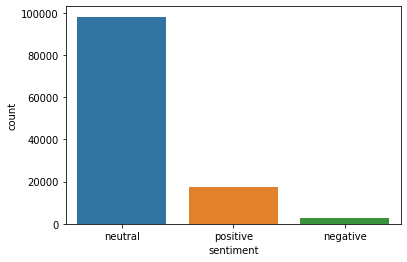

In [10]:
sns.countplot(data["sentiment"]);

In [11]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 20070421 words in the combination of all review.


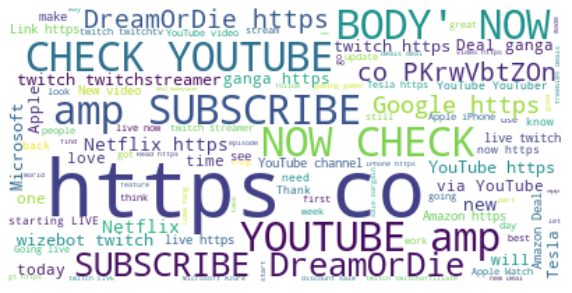

In [12]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
data.iloc[1].text

'#NVIDIA delays launch of #GeForce RTX 3070 until end of October https://t.co/5Jznv1aJkd https://t.co/uz0uGXbTQj'

In [15]:
data.iloc[5].text

'#BullSequana X2415, the first #supercomputer blade server in Europe to integrate #NVIDIA’s Ampere next-generation graphics processing unit architecture, the NVIDIA A100 Tensor Core #GPU s.  Read more ▶ https://t.co/adz4SqvtO0 Atos is sponsor at #Nvidia #GTC20 Digital https://t.co/6NrLt4sfPU'